# Predicting Bank Term Deposit Subscriptions Using Machine Learning

## Preprocessing

### Dataset Loading and Basic Information

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import joblib
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load dataset
data = pd.read_csv('Bank_data.csv', sep=';')

In [4]:
# Basic information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Check for missing values and duplicates
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows Count:", data.duplicated().sum())


Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Duplicate Rows Count: 0


In [6]:
# Summary statistics
print("\nNumerical Summary:\n", data.describe())
print("\nCategorical Summary:\n", data.describe(include=['object']))


Numerical Summary:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

## Exploratory Data Analysis

### EDA: Target Variable Distribution

In [7]:
# Setting up plot aesthetics
sns.set(style="whitegrid")

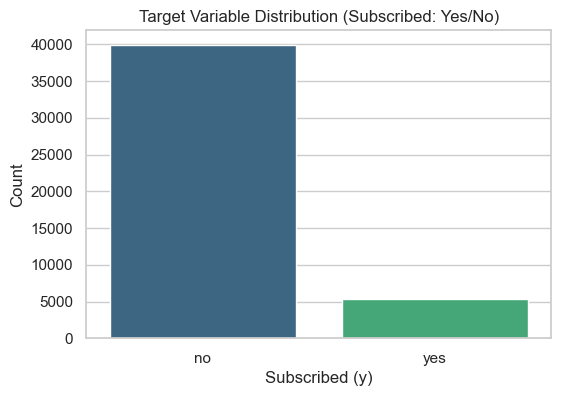

In [8]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='y', palette='viridis')
plt.title('Target Variable Distribution (Subscribed: Yes/No)')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.show()

### EDA: Numerical Variable Distributions

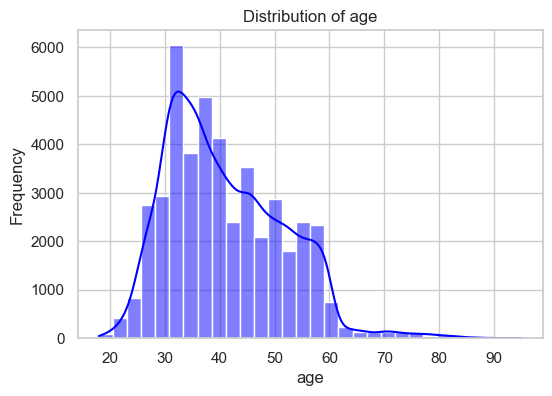

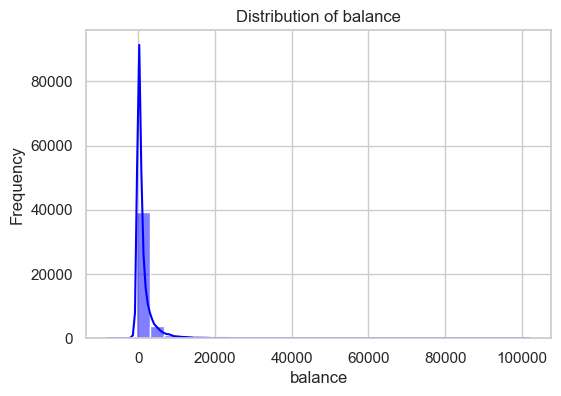

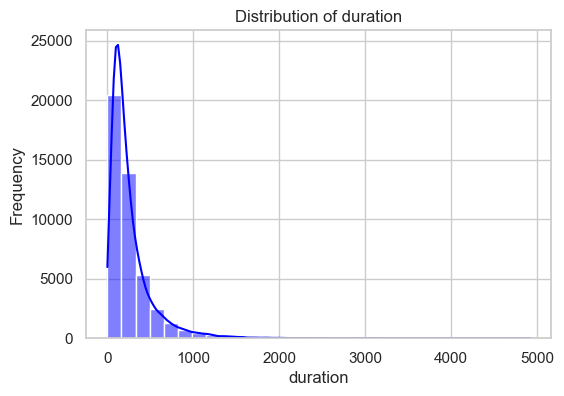

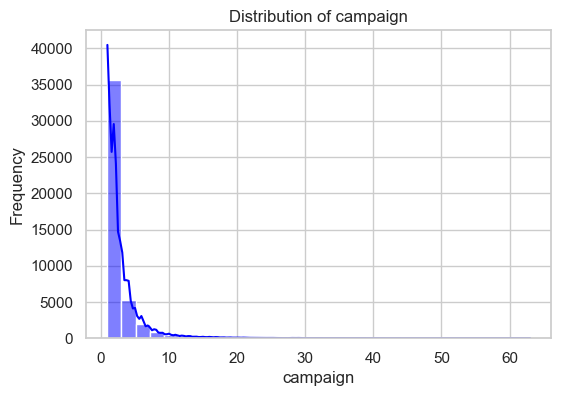

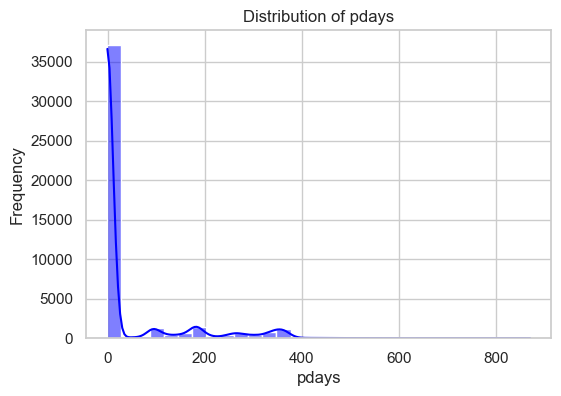

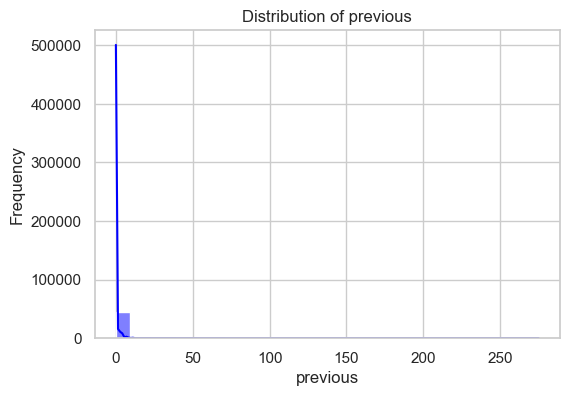

In [9]:
# Numerical variable distribution
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### EDA: Correlation Matrix

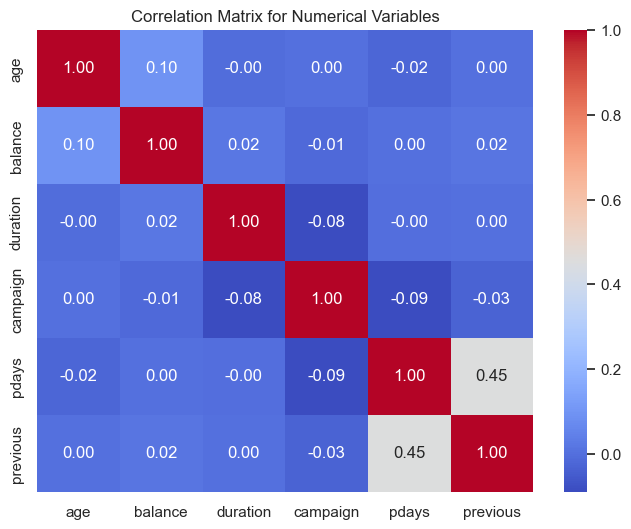

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

### EDA: Categorical Variable Distributions

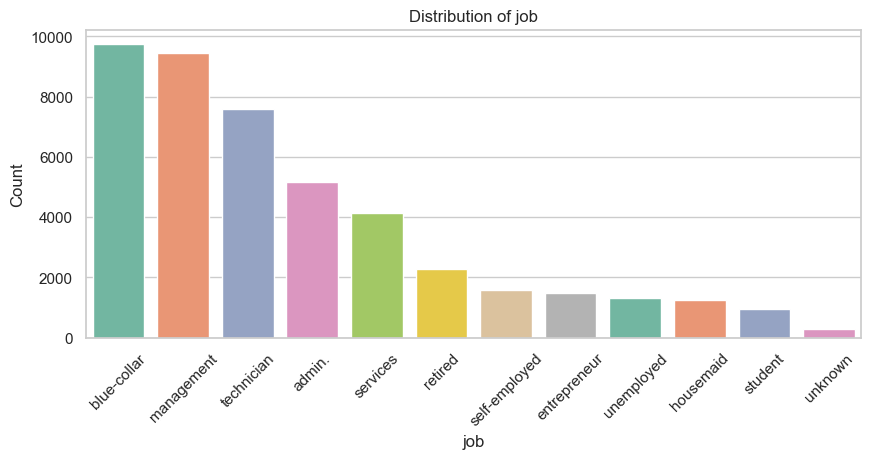

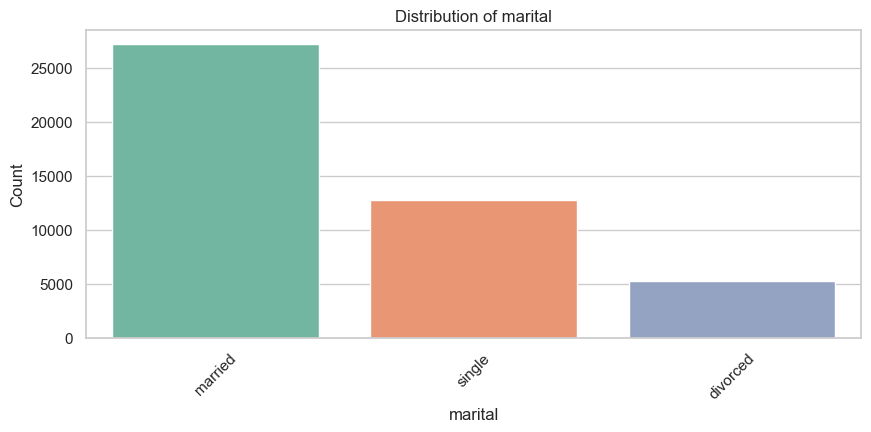

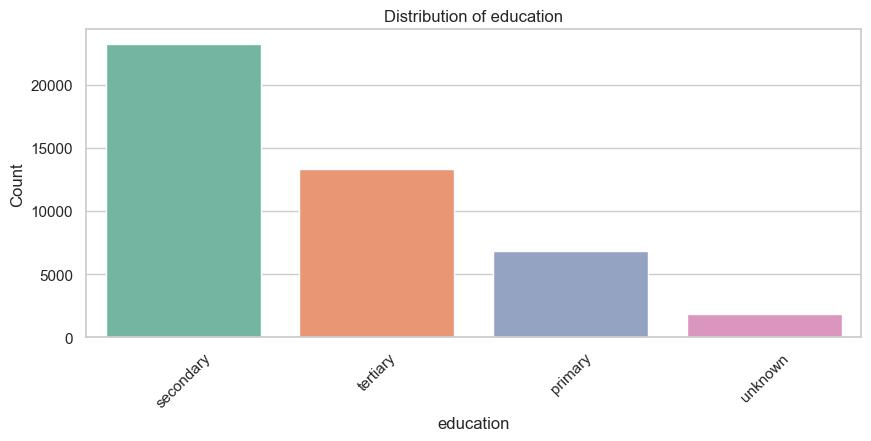

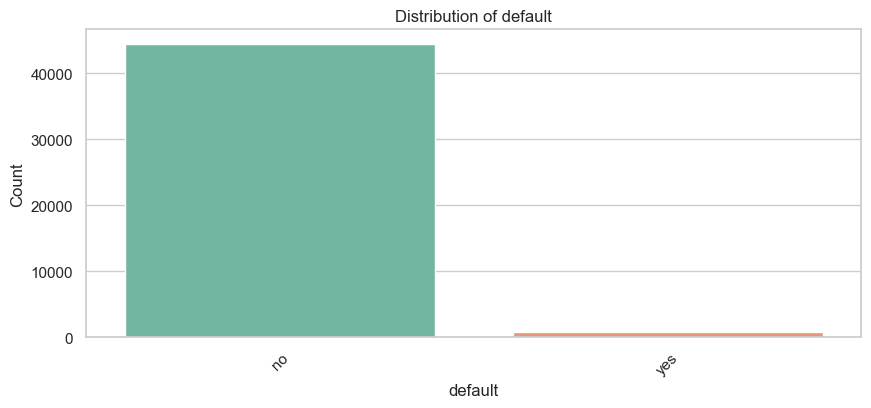

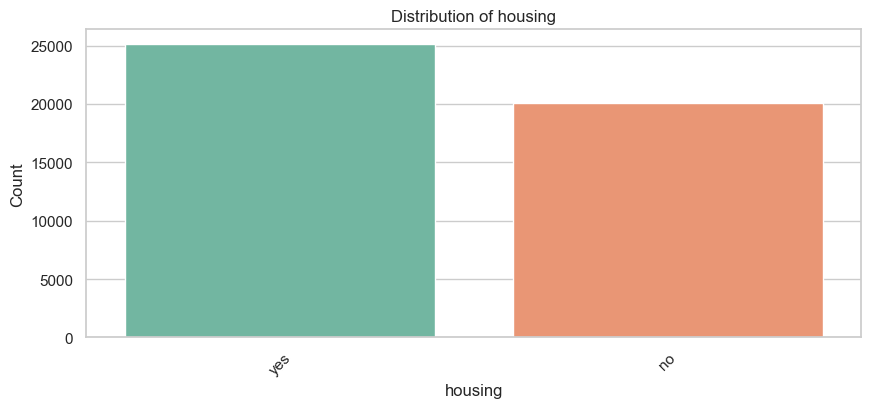

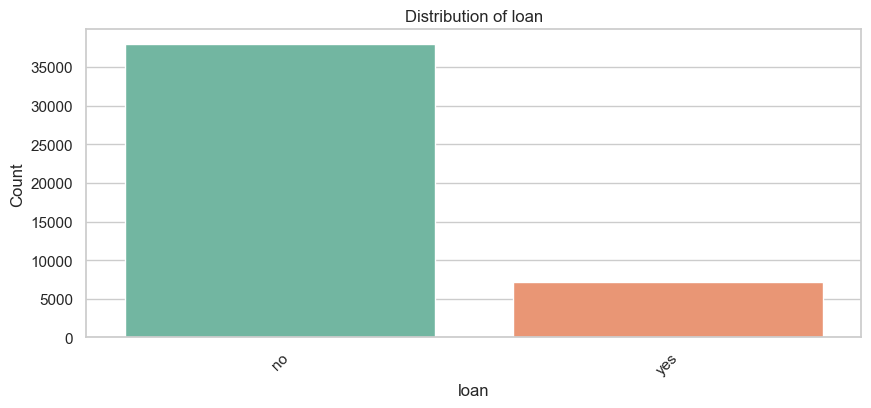

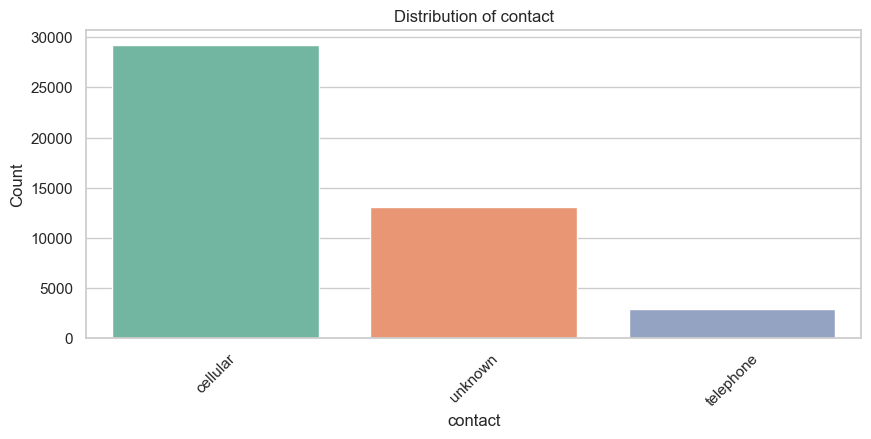

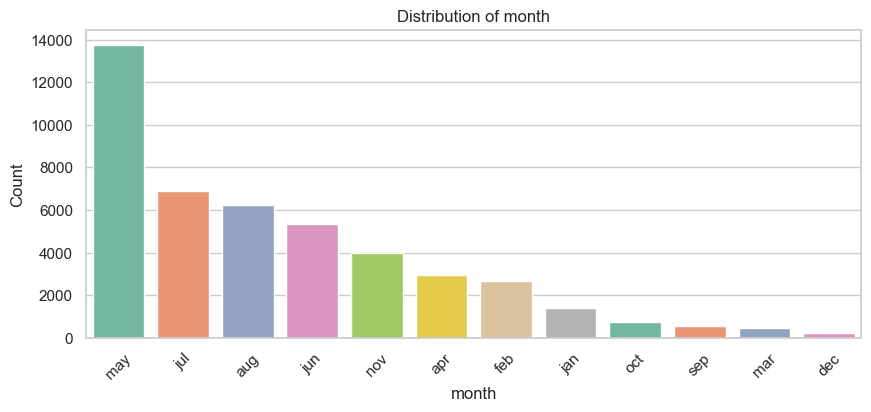

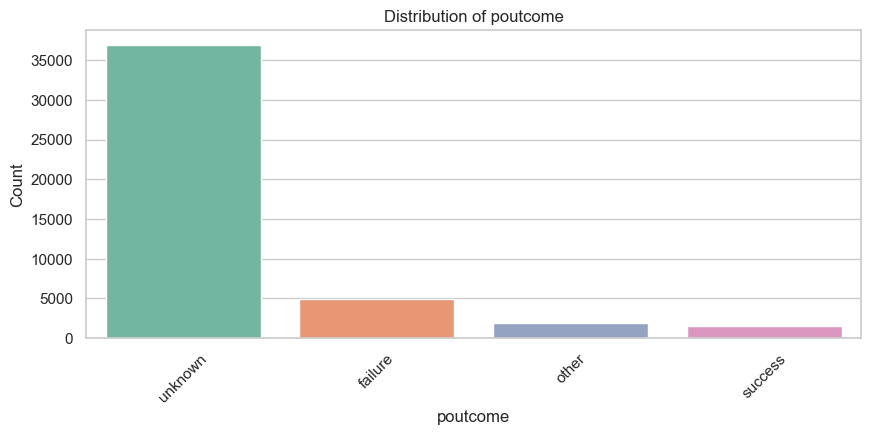

In [11]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, palette='Set2', order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Handling "Unknown" Values in Categorical Variables

In [12]:
# Replacing "unknown" with NaN for handling later
data.replace("unknown", pd.NA, inplace=True)

# Count of missing values after replacing "unknown"
print("\nMissing Values After Replacing 'unknown':\n", data.isna().sum())


Missing Values After Replacing 'unknown':
 age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


### Encoding Categorical Variables

In [13]:
# Encoding categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nEncoded Data Preview:")
print(data_encoded.head())


Encoded Data Preview:
   age  balance  day  duration  campaign  pdays  previous   y  \
0   58     2143    5       261         1     -1         0  no   
1   44       29    5       151         1     -1         0  no   
2   33        2    5        76         1     -1         0  no   
3   47     1506    5        92         1     -1         0  no   
4   33        1    5       198         1     -1         0  no   

   job_blue-collar  job_entrepreneur  ...  month_jan  month_jul  month_jun  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False              True  ...      False      False      False   
3             True             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False       True      False      F

### Handling Imbalanced Classes

In [14]:
# Splitting the data into majority and minority classes
data_majority = data[data['y'] == 'no']
data_minority = data[data['y'] == 'yes']

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                   replace=True,  # Sample with replacement
                                   n_samples=len(data_majority),  # Match majority count
                                   random_state=42)  # For reproducibility

# Combine majority and upsampled minority classes
data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Verify class distribution
print("\nBalanced Data Target Variable Distribution:\n", data_balanced['y'].value_counts())


Balanced Data Target Variable Distribution:
 y
no     39922
yes    39922
Name: count, dtype: int64


## Checking for skweness and outliers

In [15]:
# Function to check skewness
def check_skewness(df, columns):
    skewness = df[columns].skew()
    print("Skewness of Numeric Columns:")
    print(skewness)
    return skewness

In [16]:
# Function to check for outliers using IQR
def check_outliers(df, columns):
    outlier_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = len(outliers)
    print("\nNumber of Outliers in Numeric Columns:")
    print(outlier_dict)
    return outlier_dict

In [17]:
# Visualize outliers and skewness
def plot_outliers_and_skewness(df, columns):
    for col in columns:
        plt.figure(figsize=(12, 6))
        
        # Boxplot for outliers
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')
        
        # Histogram for skewness
        plt.subplot(1, 2, 2)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram for {col}')
        
        plt.tight_layout()
        plt.show()

In [18]:
# Check skewness
skewness_values = check_skewness(data, numerical_cols)

Skewness of Numeric Columns:
age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


In [19]:
# Check outliers
outlier_counts = check_outliers(data, numerical_cols)


Number of Outliers in Numeric Columns:
{'age': 487, 'balance': 4729, 'duration': 3235, 'campaign': 3064, 'pdays': 8257, 'previous': 8257}


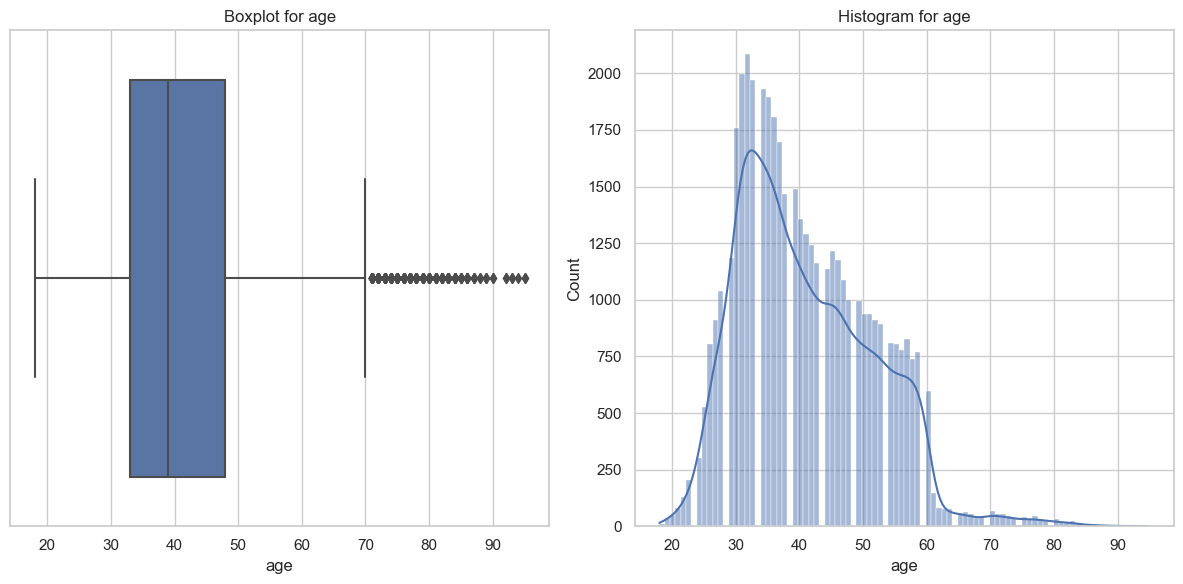

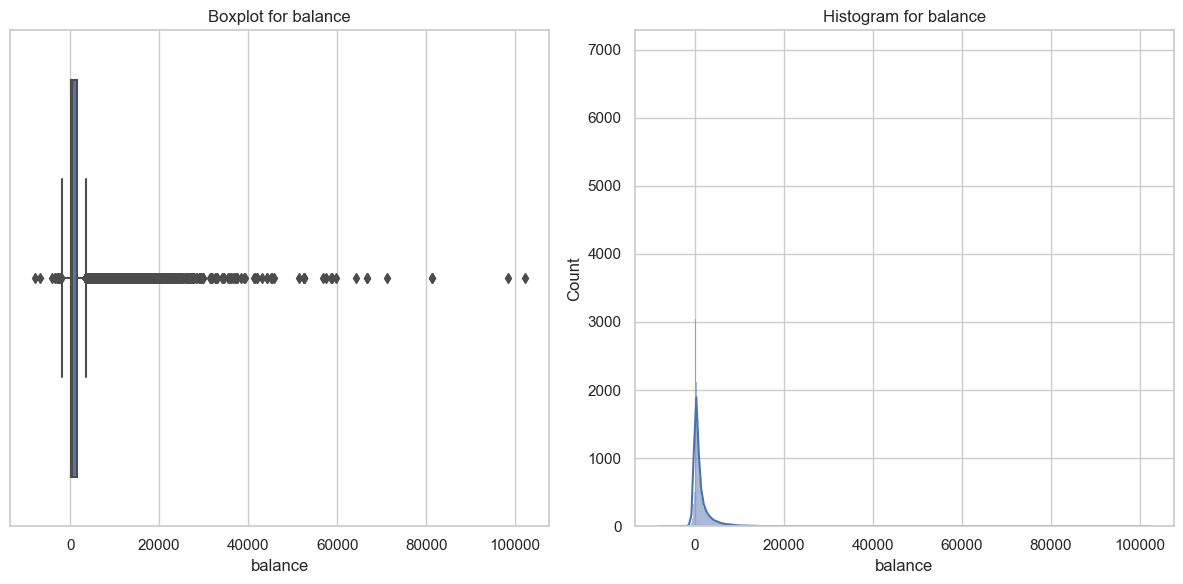

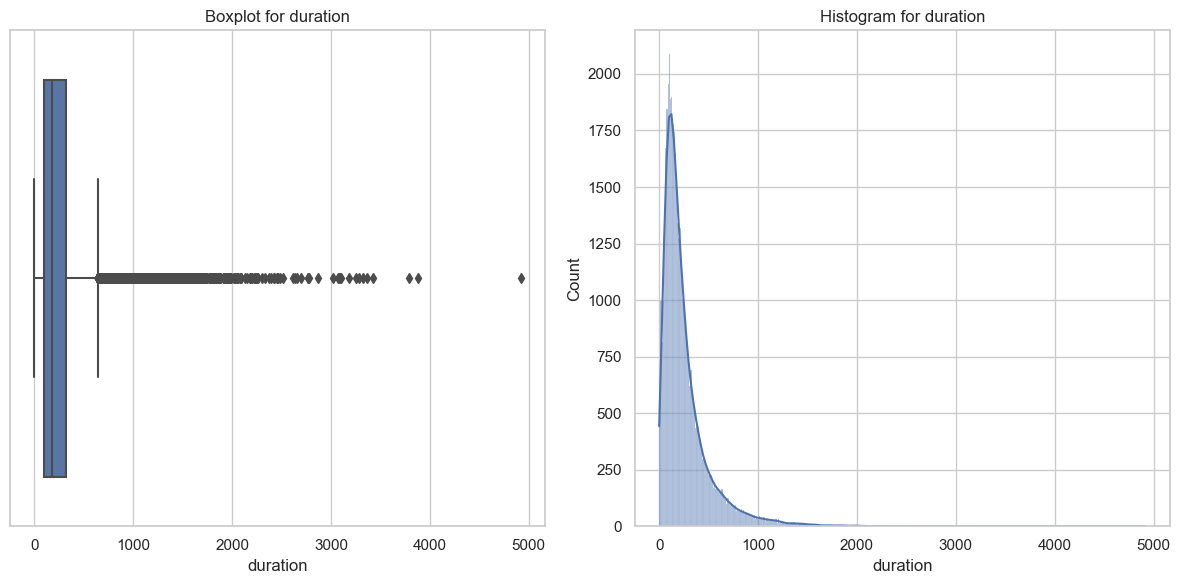

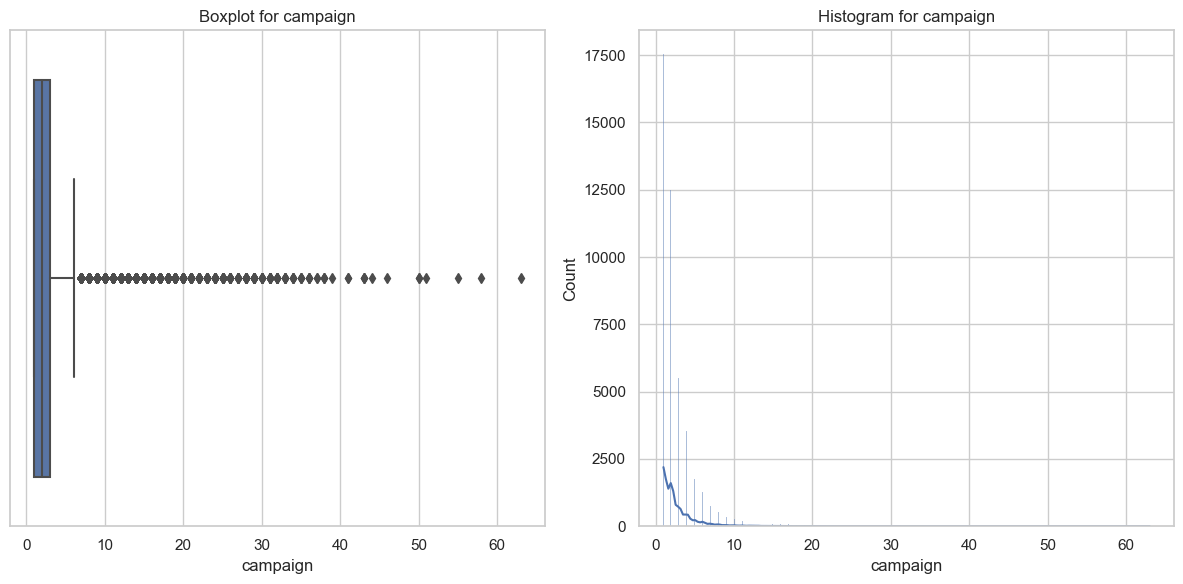

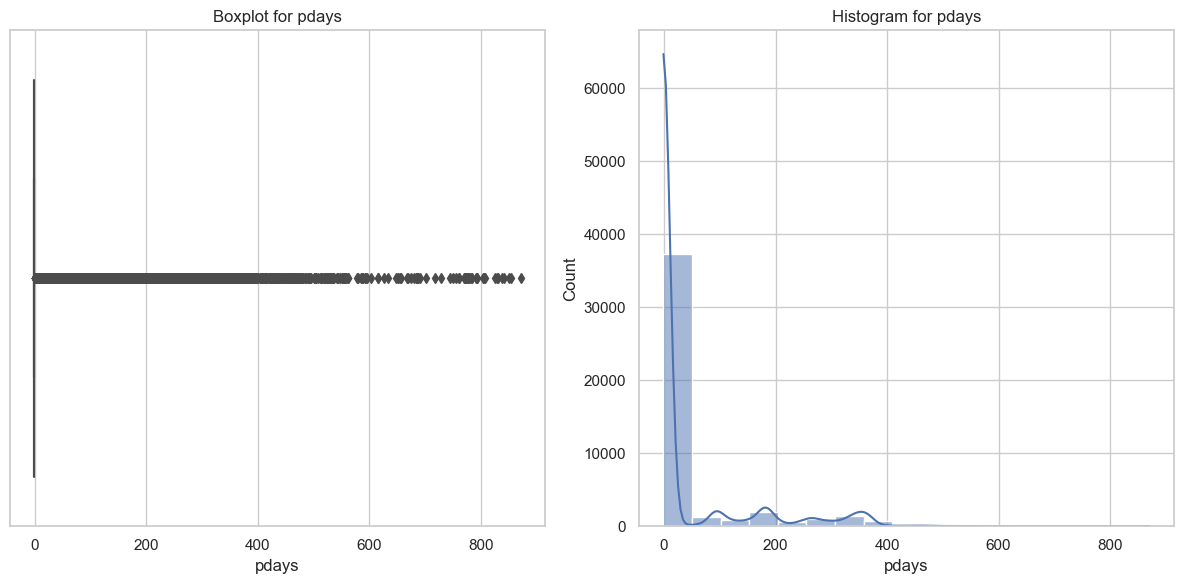

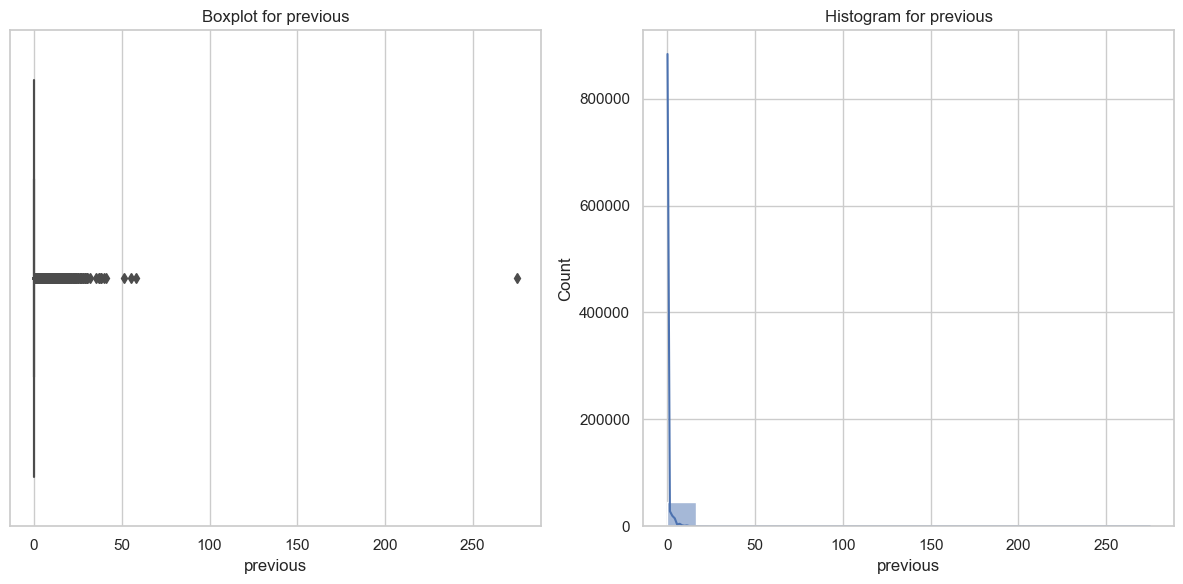

In [20]:
# Visualize the results
plot_outliers_and_skewness(data, numerical_cols)

## Feature Engineering

In [21]:
# Separate features and target variable
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

# Encode the target variable (yes -> 1, no -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [22]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [23]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Feature Selection

In [24]:
# Feature selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Get feature importance from Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
important_features_rf = feature_importance[feature_importance > 0.01].index

In [26]:
# Apply Min-Max Scaling to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [27]:
# Feature selection using SelectKBest with chi2
select_k_best = SelectKBest(score_func=chi2, k=10)
X_new = select_k_best.fit_transform(X_train_scaled, y_train)

In [28]:
# Get selected feature names
selected_features_kbest = X_train.columns[select_k_best.get_support()]
print("Selected Features (Chi-Square):\n", selected_features_kbest)

Selected Features (Chi-Square):
 Index(['duration', 'job_retired', 'job_student', 'housing_yes', 'month_dec',
       'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')


In [29]:
# Get selected feature names from SelectKBest
selected_features_kbest = X_train.columns[select_k_best.get_support()]

In [30]:
# Combine features from both methods
final_selected_features = set(important_features_rf).intersection(set(selected_features_kbest))

In [31]:
# Ensure final_selected_features is a list
final_selected_features = list(final_selected_features)

# Filter the dataset for selected features
X_train_selected = X_train[final_selected_features]
X_test_selected = X_test[final_selected_features]

In [32]:
# Output the final selected features
print("Final Selected Features:\n", final_selected_features)

Final Selected Features:
 ['duration', 'housing_yes', 'month_oct', 'month_may', 'poutcome_success', 'month_mar']


## Feature Scaling

### Min-Max Scaling

In [33]:
# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Scale numerical features in training and testing sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = min_max_scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = min_max_scaler.transform(X_test[numerical_cols])

print("Min-Max Scaling Completed!")

Min-Max Scaling Completed!


### Standardization (Z-Score Scaling)

In [34]:
# Initialize Standard Scaler
standard_scaler = StandardScaler()

# Scale numerical features in training and testing sets
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()

X_train_standardized[numerical_cols] = standard_scaler.fit_transform(X_train[numerical_cols])
X_test_standardized[numerical_cols] = standard_scaler.transform(X_test[numerical_cols])

print("Standardization Completed!")

Standardization Completed!


In [35]:
print("Before Scaling:")
print(X_train[numerical_cols].describe())
print("\nAfter Scaling:")
print(X_train_scaled[numerical_cols].describe())

Before Scaling:
                age        balance      duration      campaign         pdays  \
count  36168.000000   36168.000000  36168.000000  36168.000000  36168.000000   
mean      40.930823    1361.046146    256.891202      2.765649     40.180076   
std       10.618369    3023.083187    256.884103      3.120193    100.107617   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      70.000000    103.000000      1.000000     -1.000000   
50%       39.000000     447.000000    180.000000      2.000000     -1.000000   
75%       48.000000    1429.000000    318.000000      3.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  36168.000000  
mean       0.580264  
std        2.370668  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  

After Scaling:
                age       balance      duration  

## ML Model

### Classification Models

In [36]:
# List of classification models
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

# Train and evaluate each classifier
for name, model in classifiers.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression


C:\Users\vinil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.32      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043


Model: SVM
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.54      0.01      0.01      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.50      0.47      9043
weighted avg       0.84      0.88      0.82      9043


Model: Decision Tree
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7952
           1       0.46      0.47      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.70      

C:\Users\vinil\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.61      0.37      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043



## Model Evaluation

## Hyperparameter Tunin

### Classification Metrics
#### Metrics: Accuracy, Precision, Recall, F1-Score

C:\Users\vinil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Evaluation for Classification Model: Logistic Regression
Accuracy: 0.89
Precision: 0.60
Recall: 0.21
F1-Score: 0.32

Confusion Matrix:
[[7797  155]
 [ 857  234]]
ROC AUC Score: 0.84


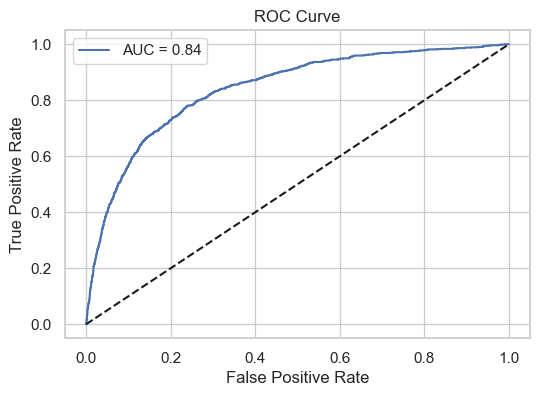


Evaluation for Classification Model: Random Forest
Accuracy: 0.91
Precision: 0.68
Recall: 0.41
F1-Score: 0.51

Confusion Matrix:
[[7738  214]
 [ 642  449]]
ROC AUC Score: 0.92


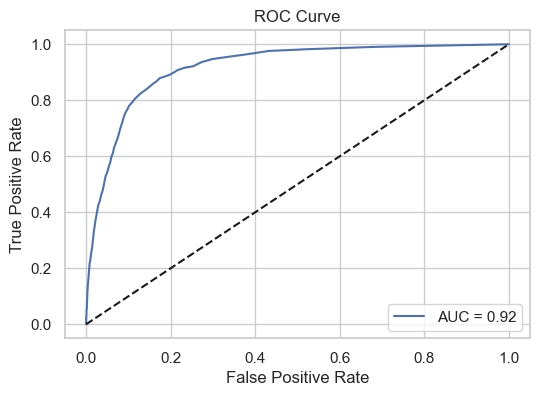


Evaluation for Classification Model: SVM
Accuracy: 0.88
Precision: 0.54
Recall: 0.01
F1-Score: 0.01

Confusion Matrix:
[[7946    6]
 [1084    7]]
ROC AUC Score: 0.72


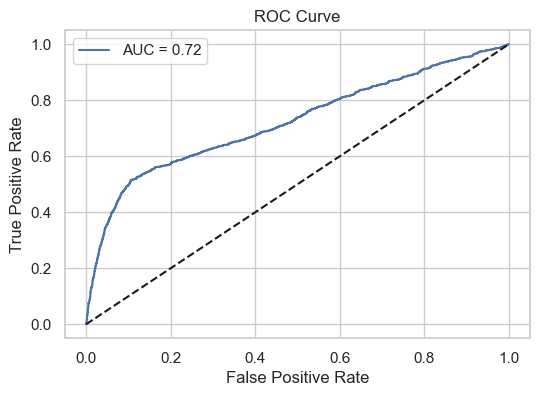

In [38]:
def evaluate_classification(y_test, y_pred, model_name, y_proba=None):
    print(f"\nEvaluation for Classification Model: {model_name}")
    
    # Basic Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # ROC Curve (if probabilities are available)
    if y_proba is not None:
        auc_score = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        print(f"ROC AUC Score: {auc_score:.2f}")

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
        plt.plot([0, 1], [0, 1], "k--")
        plt.title("ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

# Dictionary of classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
}

# Training and testing loop
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check if the model supports probability predictions
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Call evaluation function
    evaluate_classification(y_test, y_pred, name, y_proba)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

# Create a Random Forest model
rf = RandomForestClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
y_pred = best_model.predict(X_test)
evaluate_classification(y_test, y_pred, "Tuned Random Forest")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

Evaluation for Classification Model: Tuned Random Forest
Accuracy: 0.90
Precision: 0.67
Recall: 0.40
F1-Score: 0.50

Confusion Matrix:
[[7736  216]
 [ 658  433]]


## Saving the Model

In [71]:
# Save the trained model
model_filename = "trained_model.pkl"
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as trained_model.pkl


In [72]:
# Load the saved model
loaded_model = joblib.load(model_filename)

print("Model loaded successfully!")

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

Model loaded successfully!


In [75]:
# Make predictions with the loaded model on unseen data
y_pred = loaded_model.predict(X_test_standardized)

In [77]:
# Evaluate the model's performance on unseen data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Unseen Data: {accuracy:.2f}")

Accuracy on Unseen Data: 0.88


In [80]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[7952    0]
 [1091    0]]


In [81]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



C:\Users\vinil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
# evaluate probabilities (for classification models with predict_proba)
if hasattr(loaded_model, "predict_proba"):
    y_proba_unseen = loaded_model.predict_proba(X_test_standardized)[:, 1]
    print("\nROC AUC Score for Unseen Data:", roc_auc_score(y_test, y_proba_unseen))


ROC AUC Score for Unseen Data: 0.7241224039931615
